In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

In [3]:
file_location = 'C:/Users/Nadir/Belajar_Python/Jupyter/data_nilai_pbo.xlsx'
df = pd.read_excel(file_location)

In [4]:
df.head()

,Nama,Jenis Kelamin,Kelas,Nilai Polimorphisme,Nilai Penggunaan package,Nilai Interface,Nilai Class built-in,Nilai Error handling
0,AS SAJJADTUL IVASHA,Perempuan,XI RPL 1,90,91,88,89,90
1,ASKIA VIRMANIA,Perempuan,XI RPL 1,90,91,88,88,89
2,ASTRA HERLAMBANG,Laki-laki,XI RPL 1,90,91,88,89,90
3,DIONA PUTRA,Laki-laki,XI RPL 1,90,91,88,89,90
4,FADLURRAHMAN RAFI,Laki-laki,XI RPL 1,85,86,83,85,86


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Nama                      49 non-null     object
 1   Jenis Kelamin             49 non-null     object
 2   Kelas                     49 non-null     object
 3   Nilai Polimorphisme       49 non-null     int64 
 4   Nilai Penggunaan package  49 non-null     int64 
 5   Nilai Interface           49 non-null     int64 
 6   Nilai Class built-in      49 non-null     int64 
 7   Nilai Error handling      49 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 3.2+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Nilai Polimorphisme,49.0,87.469388,2.693372,80.0,85.0,87.0,90.0,92.0
Nilai Penggunaan package,49.0,88.224490,2.778379,81.0,86.0,88.0,91.0,93.0
Nilai Interface,49.0,85.408163,2.985509,78.0,83.0,85.0,88.0,92.0
Nilai Class built-in,49.0,86.183673,2.920284,79.0,84.0,86.0,89.0,93.0
Nilai Error handling,49.0,86.673469,3.508251,79.0,84.0,87.0,90.0,94.0


In [8]:
df.isnull().sum()

Nama                        0
Jenis Kelamin               0
Kelas                       0
Nilai Polimorphisme         0
Nilai Penggunaan package    0
Nilai Interface             0
Nilai Class built-in        0
Nilai Error handling        0
dtype: int64

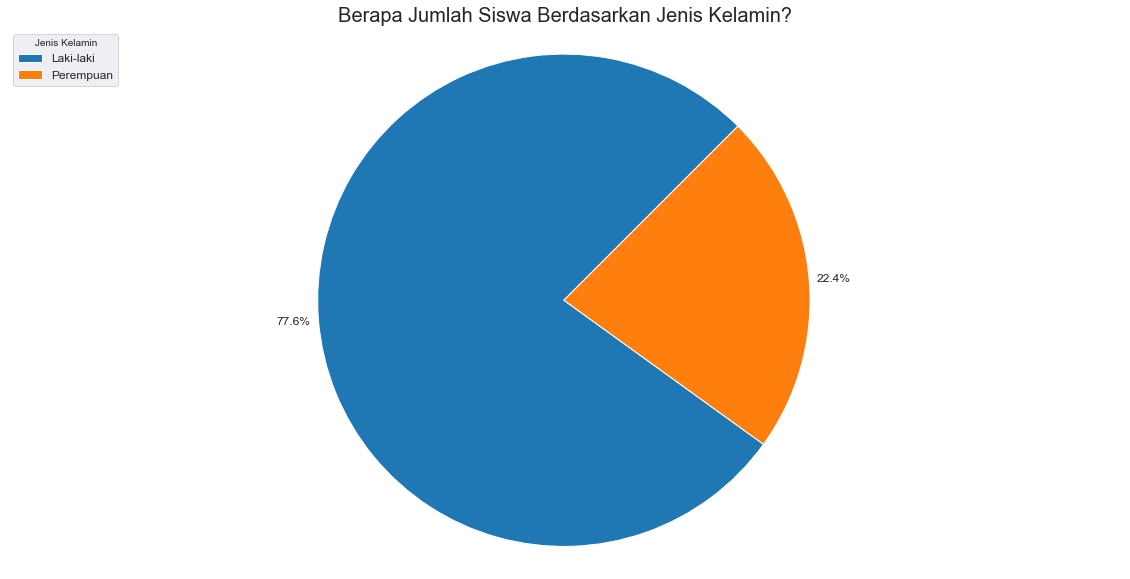

In [9]:
JK_counts = df["Jenis Kelamin"].value_counts()
ax = JK_counts.plot(kind='pie',
             figsize = (20,10),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             textprops={'fontsize': 12})
ax.patch.set_facecolor('white')
plt.title('Berapa Jumlah Siswa Berdasarkan Jenis Kelamin?', size = 20)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(labels=["Laki-laki", "Perempuan"], loc="upper left", title="Jenis Kelamin", fontsize=12);

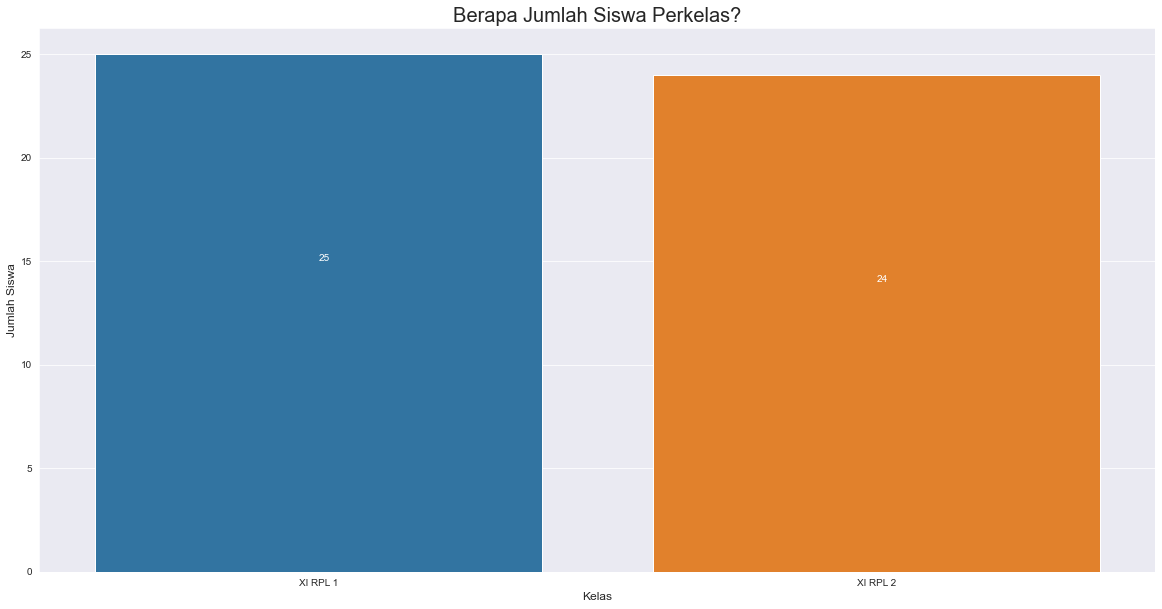

In [24]:
Kelas_value_counts = df['Kelas'].value_counts()
plt.figure(figsize=(20,10))
ax = sns.barplot(x=Kelas_value_counts.index, y=Kelas_value_counts.values)
ax.set_title("Berapa Jumlah Siswa Perkelas?", size=20)
ax.set_xlabel(xlabel="Kelas", size=12)
ax.set_ylabel(ylabel="Jumlah Siswa", size=12)

# Annotate value labels to each level
for index, value in enumerate(Kelas_value_counts): 
    plt.annotate(value, xy=(index, value-10), color='white')

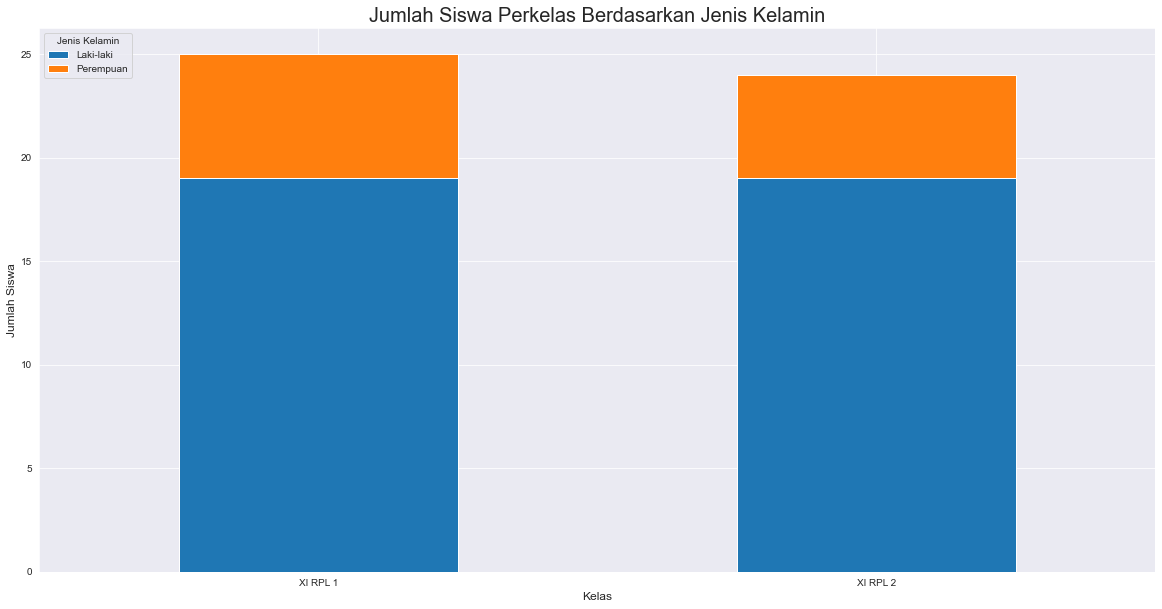

In [25]:
ax = pd.crosstab(df["Kelas"], [df["Jenis Kelamin"]]).plot.bar(stacked=True, figsize=(20,10))
ax.set_title("Jumlah Siswa Perkelas Berdasarkan Jenis Kelamin", size=20)
ax.set_xlabel(xlabel="Kelas", size=12)
ax.set_ylabel(ylabel="Jumlah Siswa", size=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(loc="upper left", title="Jenis Kelamin");

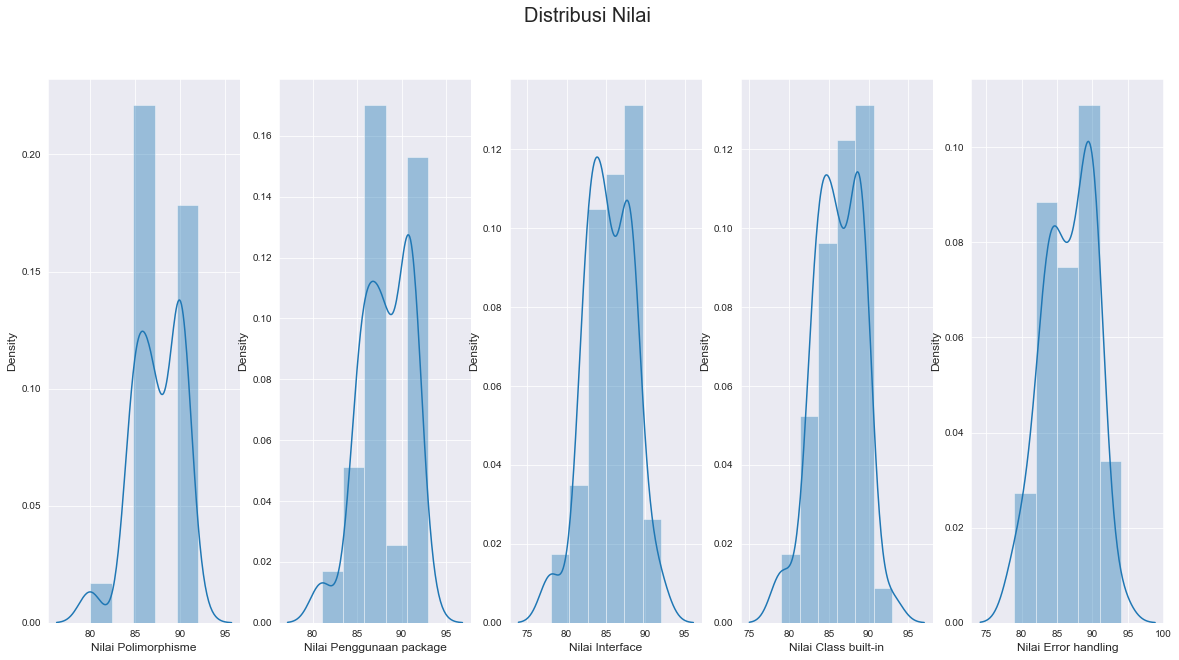

In [26]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df[["Nilai Polimorphisme", "Nilai Penggunaan package", "Nilai Interface","Nilai Class built-in","Nilai Error handling"]].items():
    sns.distplot(value, ax=ax[index])
    ax[index].set_xlabel(xlabel=col, size=12)
    ax[index].set_ylabel(ylabel="Density", size=12)
    index += 1
    
fig.suptitle("Distribusi Nilai", fontsize=20);

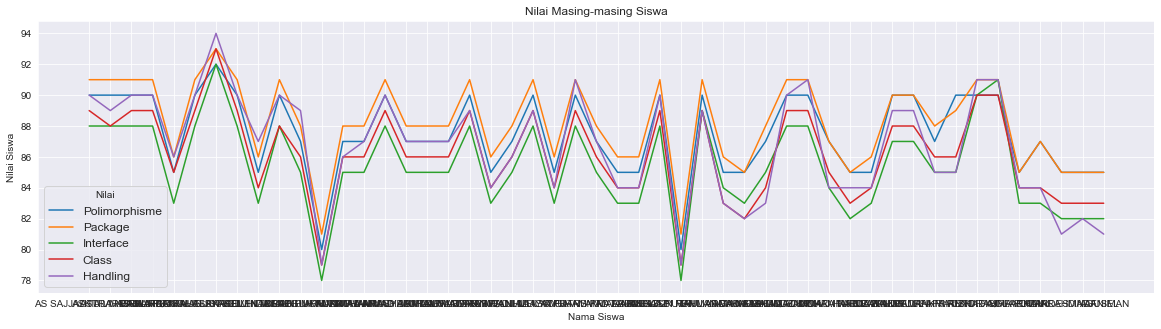

In [64]:
plt.figure(figsize=(20,5))

plt.plot(df['Nama'], df['Nilai Polimorphisme'], label='Polimorphisme')
plt.plot(df['Nama'], df['Nilai Penggunaan package'], label='Package')
plt.plot(df['Nama'], df['Nilai Interface'], label='Interface')
plt.plot(df['Nama'], df['Nilai Class built-in'], label='Class')
plt.plot(df['Nama'], df['Nilai Error handling'], label='Handling')

plt.xlabel('Nama Siswa')
plt.ylabel('Nilai Siswa')
plt.title('Nilai Masing-masing Siswa')
plt.grid(True)
plt.legend(loc="lower left", title="Nilai", fontsize=12);
plt.show()